In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

## 1. Read and explore the given dataset
We will understand the shape of the data,data types and will drop useless columns. 
We will use visualization techniques later when we take a subset of this dataset.

In [2]:
data=pd.read_csv("ratings_Electronics.csv")

In [3]:
data.head()

,AKM1MP6P0OYPR,0132793040,5.0,1365811200
0,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
1,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
2,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
3,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200
4,A1QGNMC6O1VW39,0511189877,5.0,1397433600


In [5]:
data=data.drop(['1365811200'],axis=1)

In [6]:
data.head()

,AKM1MP6P0OYPR,0132793040,5.0
0,A2CX7LUOHB2NDG,0321732944,5.0
1,A2NWSAGRHCP8N5,0439886341,1.0
2,A2WNBOD3WNDNKT,0439886341,3.0
3,A1GI0U4ZRJA8WN,0439886341,1.0
4,A1QGNMC6O1VW39,0511189877,5.0


In [7]:
data.shape

(7824481, 3)

In [110]:
data.dtypes

USERID        object
PRODUCTID     object
RATINGS      float64
dtype: object

## 2. Taking a subset of the data(Only choosing those users who have rated more than 50 times)

We will take a subset of this dataset and would consider only those users who have given mroe than 50 ratings

In [8]:
data=data.rename(columns={'AKM1MP6P0OYPR': 'USERID', '0132793040': 'PRODUCTID','5.0':'RATINGS'})

In [9]:
data.head()

,USERID,PRODUCTID,RATINGS
0,A2CX7LUOHB2NDG,0321732944,5.0
1,A2NWSAGRHCP8N5,0439886341,1.0
2,A2WNBOD3WNDNKT,0439886341,3.0
3,A1GI0U4ZRJA8WN,0439886341,1.0
4,A1QGNMC6O1VW39,0511189877,5.0


In [10]:
data.groupby('USERID')['RATINGS'].count().sort_values(ascending=False)>50

USERID
A5JLAU2ARJ0BO             True
ADLVFFE4VBT8              True
A3OXHLG6DIBRW8            True
A6FIAB28IS79              True
A680RUE1FDO8B             True
                         ...  
A3AAXZAK8EB9KG           False
A3AAXY0TMZS72Y           False
A3AAXX0N47FFP            False
A3AAXWHVCN6VOG           False
A00000262KYZUE4J55XGL    False
Name: RATINGS, Length: 4201696, dtype: bool

In [11]:
user_data=pd.DataFrame(data.groupby('USERID')['RATINGS'].count().sort_values(ascending=False)>100)

In [12]:
user_data

,RATINGS
USERID,
A5JLAU2ARJ0BO,True
ADLVFFE4VBT8,True
A3OXHLG6DIBRW8,True
A6FIAB28IS79,True
A680RUE1FDO8B,True
...,...
A3AAXZAK8EB9KG,False
A3AAXY0TMZS72Y,False
A3AAXX0N47FFP,False


In [13]:
user_data=user_data[user_data['RATINGS'] == True]  # user_data will have only rows with True in 'RATINGS'

In [14]:
user_data['USERID']=user_data.index

<ipython-input-14-c13766ca180d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_data['USERID']=user_data.index


In [15]:
user_data.head()

,RATINGS,USERID
USERID,,
A5JLAU2ARJ0BO,True,A5JLAU2ARJ0BO
ADLVFFE4VBT8,True,ADLVFFE4VBT8
A3OXHLG6DIBRW8,True,A3OXHLG6DIBRW8
A6FIAB28IS79,True,A6FIAB28IS79
A680RUE1FDO8B,True,A680RUE1FDO8B


In [16]:
user_data.shape

(280, 2)

In [17]:
user_data.reset_index(drop=True, inplace=True)

In [18]:
user_data.head()

,RATINGS,USERID
0,True,A5JLAU2ARJ0BO
1,True,ADLVFFE4VBT8
2,True,A3OXHLG6DIBRW8
3,True,A6FIAB28IS79
4,True,A680RUE1FDO8B


In [19]:
user_data=user_data.drop(['RATINGS'],axis=1)
user_data.head()

,USERID
0,A5JLAU2ARJ0BO
1,ADLVFFE4VBT8
2,A3OXHLG6DIBRW8
3,A6FIAB28IS79
4,A680RUE1FDO8B


In [20]:
df=pd.merge(user_data,data,on='USERID')

In [21]:
df.head()

,USERID,PRODUCTID,RATINGS
0,A5JLAU2ARJ0BO,1400532655,1.0
1,A5JLAU2ARJ0BO,B00003006R,5.0
2,A5JLAU2ARJ0BO,B00003G1RG,3.0
3,A5JLAU2ARJ0BO,B00004S9AK,5.0
4,A5JLAU2ARJ0BO,B00004SB92,4.0


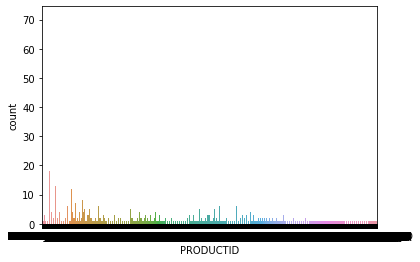

In [92]:
sns.countplot(df['PRODUCTID'])

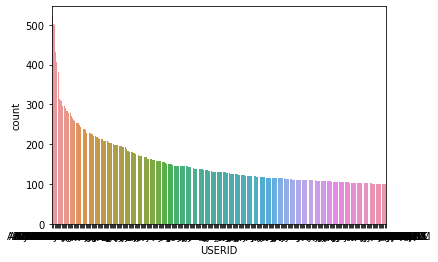

In [111]:
sns.countplot(df['USERID'])

## 3.Now that we have our dataset which contains only those users who have rated more than 50 times, we will build a popularity recommender model

In [22]:
df.tail()

,USERID,PRODUCTID,RATINGS
43304,A7EJERNB7IK3Z,B008CS5T76,1.0
43305,A7EJERNB7IK3Z,B0090SLJ1C,1.0
43306,A7EJERNB7IK3Z,B009JBZFVK,5.0
43307,A7EJERNB7IK3Z,B00AJ0X4WW,3.0
43308,A7EJERNB7IK3Z,B00CHIKIDM,5.0


In [23]:
df.groupby('PRODUCTID')['RATINGS'].mean()

PRODUCTID
0594481813    3.0
0970407998    4.0
0972683275    5.0
1400501776    4.0
1400532655    2.0
             ... 
B00LA6T0LS    4.0
B00LBZ1Z7K    3.0
B00LGQ6HL8    5.0
B00LI4ZZO8    4.5
B00LKG1MC8    5.0
Name: RATINGS, Length: 22267, dtype: float64

In [24]:
df.shape

(43309, 3)

In [25]:
df

,USERID,PRODUCTID,RATINGS
0,A5JLAU2ARJ0BO,1400532655,1.0
1,A5JLAU2ARJ0BO,B00003006R,5.0
2,A5JLAU2ARJ0BO,B00003G1RG,3.0
3,A5JLAU2ARJ0BO,B00004S9AK,5.0
4,A5JLAU2ARJ0BO,B00004SB92,4.0
...,...,...,...
43304,A7EJERNB7IK3Z,B008CS5T76,1.0
43305,A7EJERNB7IK3Z,B0090SLJ1C,1.0
43306,A7EJERNB7IK3Z,B009JBZFVK,5.0
43307,A7EJERNB7IK3Z,B00AJ0X4WW,3.0


In [26]:
df['PRODUCTID'].nunique()

22267

In [27]:
df['USERID'].nunique()

280

In [28]:
df.groupby('PRODUCTID')['RATINGS'].mean().sort_values(ascending=False).head(10)

PRODUCTID
B00LKG1MC8    5.0
B004ULOZPQ    5.0
B004UR72IM    5.0
B004UR7250    5.0
B004UR487A    5.0
B000V9F3BG    5.0
B004UQ05N2    5.0
B004UQ05M8    5.0
B000V9GCP2    5.0
B004ULPF50    5.0
Name: RATINGS, dtype: float64

In [29]:
rating_mean_count=pd.DataFrame(df.groupby('PRODUCTID')['RATINGS'].mean())

In [30]:
rating_mean_count['rating_counts']=pd.DataFrame(df.groupby('PRODUCTID')['RATINGS'].count())

In [31]:
rating_mean_count.sort_values(ascending=False,by='RATINGS')

,RATINGS,rating_counts
PRODUCTID,,
B00LKG1MC8,5.0,1
B005PRNQFO,5.0,1
B005PYD2RE,5.0,1
B0019F8MEG,5.0,1
B0019FGK90,5.0,1
...,...,...
B000ALAJTQ,1.0,1
B0035P4BXO,1.0,1
B00AWLCIO8,1.0,1


In [32]:
best_rating=rating_mean_count[rating_mean_count['RATINGS']>4]
best_rating.head()

,RATINGS,rating_counts
PRODUCTID,,
0972683275,5.0,1
1400699169,5.0,1
1685560148,5.0,1
787988002X,5.0,1
9800359788,5.0,1


##### Below is the dataframe which helps us visualize our Popularity based recommendation model

In [107]:
Popularity_model=best_rating[best_rating['rating_counts']>30].sort_values(ascending=False,by='RATINGS').head(10)
Popularity_model

,RATINGS,rating_counts
PRODUCTID,,
B003ES5ZUU,5.000000,54
B00G4UQ6U8,4.909091,33
B0082E9K7U,4.787879,33
B002V88HFE,4.781250,32
B000N99BBC,4.765957,47
B00BOHNYTW,4.757576,33
B004CLYEFK,4.720930,43
B0034CL2ZI,4.709677,31
B007WTAJTO,4.675676,37


## Following cells contain Steps4,5,6,7
#### Step4:Splitting dataset into training and testing set
#### Step5:Building Collaborative Filtering Model
#### Step6:Evaluate the model
#### Step7:Get top 5 recommendations
##### I have also built a Matrix Factorization model

In [34]:
from collections import defaultdict
from surprise import SVD
from surprise import Dataset
from surprise import Reader

In [35]:
reader=Reader(rating_scale=(1,5))

In [36]:
data_s=Dataset.load_from_df(df,reader)

In [37]:
trainset=data_s.build_full_trainset()

In [38]:
trainset.ur

defaultdict(list,
            {0: [(0, 1.0),
              (1, 5.0),
              (2, 3.0),
              (3, 5.0),
              (4, 4.0),
              (5, 4.0),
              (6, 5.0),
              (7, 2.0),
              (8, 3.0),
              (9, 4.0),
              (10, 1.0),
              (11, 5.0),
              (12, 5.0),
              (13, 5.0),
              (14, 5.0),
              (15, 5.0),
              (16, 5.0),
              (17, 4.0),
              (18, 4.0),
              (19, 5.0),
              (20, 5.0),
              (21, 5.0),
              (22, 5.0),
              (23, 5.0),
              (24, 5.0),
              (25, 5.0),
              (26, 5.0),
              (27, 5.0),
              (28, 5.0),
              (29, 5.0),
              (30, 5.0),
              (31, 4.0),
              (32, 5.0),
              (33, 5.0),
              (34, 3.0),
              (35, 4.0),
              (36, 2.0),
              (37, 5.0),
              (38, 5.0),
              

### Matrix Factorization

In [95]:
algo=SVD()
algo.fit(trainset)

In [96]:
testset=trainset.build_anti_testset()

In [97]:
testset

[('AGVWTYW0ULXHT', 'B009WZRCO6', 4.277789851135499),
 ('AGVWTYW0ULXHT', 'B002XOLT7Y', 4.277789851135499),
 ('AGVWTYW0ULXHT', 'B00EU9V3S0', 4.277789851135499),
 ('AGVWTYW0ULXHT', 'B000SKTZLW', 4.277789851135499),
 ('AGVWTYW0ULXHT', 'B005FE72Q6', 4.277789851135499),
 ('AGVWTYW0ULXHT', 'B000EQADHA', 4.277789851135499),
 ('AGVWTYW0ULXHT', 'B008R6WUZC', 4.277789851135499),
 ('AGVWTYW0ULXHT', 'B005GCB6CS', 4.277789851135499),
 ('AGVWTYW0ULXHT', 'B006GJU33I', 4.277789851135499),
 ('AGVWTYW0ULXHT', 'B004L9M0AO', 4.277789851135499),
 ('AGVWTYW0ULXHT', 'B001VEAI74', 4.277789851135499),
 ('AGVWTYW0ULXHT', 'B004RE282I', 4.277789851135499),
 ('AGVWTYW0ULXHT', 'B000P6W4SA', 4.277789851135499),
 ('AGVWTYW0ULXHT', 'B007WTAJTO', 4.277789851135499),
 ('AGVWTYW0ULXHT', 'B00D6HBVIO', 4.277789851135499),
 ('AGVWTYW0ULXHT', 'B0002FHENE', 4.277789851135499),
 ('AGVWTYW0ULXHT', 'B004BDORE2', 4.277789851135499),
 ('AGVWTYW0ULXHT', 'B009JZ05SY', 4.277789851135499),
 ('AGVWTYW0ULXHT', 'B0002V8KWM', 4.27778985113

In [98]:
predictions_matrix=algo.test(testset)

In [99]:
predictions_matrix

[Prediction(uid='AGVWTYW0ULXHT', iid='B009WZRCO6', r_ui=4.277789851135499, est=3.899730181654147, details={'was_impossible': False}),
 Prediction(uid='AGVWTYW0ULXHT', iid='B002XOLT7Y', r_ui=4.277789851135499, est=3.994998813995471, details={'was_impossible': False}),
 Prediction(uid='AGVWTYW0ULXHT', iid='B00EU9V3S0', r_ui=4.277789851135499, est=3.972850308050336, details={'was_impossible': False}),
 Prediction(uid='AGVWTYW0ULXHT', iid='B000SKTZLW', r_ui=4.277789851135499, est=4.229833524449246, details={'was_impossible': False}),
 Prediction(uid='AGVWTYW0ULXHT', iid='B005FE72Q6', r_ui=4.277789851135499, est=4.191124345301729, details={'was_impossible': False}),
 Prediction(uid='AGVWTYW0ULXHT', iid='B000EQADHA', r_ui=4.277789851135499, est=4.17389058375758, details={'was_impossible': False}),
 Prediction(uid='AGVWTYW0ULXHT', iid='B008R6WUZC', r_ui=4.277789851135499, est=4.068606436368532, details={'was_impossible': False}),
 Prediction(uid='AGVWTYW0ULXHT', iid='B005GCB6CS', r_ui=4.27778

##### Below are the top 5 recommendations for each user when we use Matrix Factorization method

In [80]:
def get_top_n(predictions,n=5):
    #Mapping the predictions to each user
    top_n=defaultdict(list)
    for uid,iid,true_r,est, _ in predictions:
        top_n[uid].append((iid,est))
        
    #Sort out the predictions for each user and retriece the k highest ones.
    for uid,user_ratings in top_n.items():
        user_ratings.sort(key=lambda x:x[1], reverse=True)
        top_n[uid]=user_ratings[:n]
    return top_n

In [83]:
top_n_matrix= get_top_n(predictions,n=5)

In [84]:
top_n_matrix

defaultdict(list,
            {'AGVWTYW0ULXHT': [('B003ES5ZUU', 4.702391043772119),
              ('B008EQZ25K', 4.642930099408767),
              ('B001TH7GUU', 4.599445843538399),
              ('B00J238GV6', 4.595210738929443),
              ('B00FR6VL50', 4.573004433383969)],
             'A1VQHH85U7PX0': [('B00HFRWWAM', 5),
              ('B000N99BBC', 5),
              ('B004JMZPJQ', 5),
              ('B004CLYEDC', 5),
              ('B00HXIYIE6', 5)],
             'A23GFTVIETX7DS': [('B003ES5ZUU', 5),
              ('B002V88HFE', 4.964942751414827),
              ('B001TH7GUU', 4.9238875870598795),
              ('B00HFRWWAM', 4.898282399153206),
              ('B004YKXGIK', 4.894324451965057)],
             'A3TAS1AG6FMBQW': [('B008R6WUZC', 5),
              ('B007WTAJTO', 5),
              ('B001TOD7ME', 5),
              ('B000N99BBC', 5),
              ('B0082E9K7U', 5)],
             'A11KZ906QD08C5': [('B003X7TRWE', 5),
              ('B003ES5ZUU', 5),
              ('B00

In [47]:
for uid,user_ratings in top_n.items():
    print(uid,[iid for (iid,_) in user_ratings])

A5JLAU2ARJ0BO ['B0093AN1OA', 'B000ALM3RC', 'B003XFWSU4', 'B000083EAI', 'B008LTBITY', 'B00006I53W', 'B00GWVNK8A', 'B006BGZJJ4', 'B000ITB7GO', 'B000L9OIQC']
ADLVFFE4VBT8 ['B000N99BBC', 'B002QEBMAK', 'B00EDCF0MY', 'B001D8S9E2', 'B000JV9LUK', 'B00BQ4F9ZA', 'B00BW6KCTU', 'B00IVFDZBC', 'B00368CDH6', 'B00015Y0FK']
A3OXHLG6DIBRW8 ['B00008OE6I', 'B000N99BBC', 'B00CHH0JF0', 'B00119T6NQ', 'B001O4EPHA', 'B00GBATPFO', 'B001TUYTZM', 'B002K9IHGI', 'B0035FZJHQ', 'B00JWXNT2M']
A6FIAB28IS79 ['B004XC6GJ0', 'B00023CJI6', 'B002XITTS6', 'B001F7BFOW', 'B005LMWP82', 'B00005AT7Y', 'B000BNLGJA', 'B000JJSQ30', 'B00DTZYHX4', 'B002LEVGMO']
A680RUE1FDO8B ['B000066E70', 'B00008I9K8', 'B0000A0AJH', 'B0000AQFZ9', 'B0000DBJUB', 'B0001G0FFS', 'B003ZSHNGS', 'B0009Y7APU', 'B000HPV3RW', 'B0011U65F2']
A1ODOGXEYECQQ8 ['B000JV9LUK', 'B00HFRWWAM', 'B00BQ4F9ZA', 'B0019EHU8G', 'B007BXD66E', 'B00IVFDZBC', 'B00BOHNYU6', 'B005FYNSPK', 'B001TH7GUU', 'B0012Y2LLE']
A36K2N527TXXJN ['B001TH7GUU', 'B0062EUE54', 'B00119T6NQ', 'B00GBATPFO'

##### Evaluation of Matrix Factorization model

In [100]:
accuracy.mae(predictions_matrix,verbose=True)

MAE:  0.3025


0.3024794449874971

In [105]:
from surprise import accuracy
print("Matrix Factorization Model:Test Set")
accuracy.rmse(predictions_matrix,verbose=True)

Matrix Factorization Model:Test Set
RMSE: 0.3866


0.3865848986121535

### User-User Collaborative Filtering

In [49]:
from surprise import KNNWithMeans
from surprise.model_selection import train_test_split

In [50]:
reader=Reader(rating_scale=(1,5))

In [65]:
data_u=Dataset.load_from_df(df,reader)

In [66]:
trainset,testset=train_test_split(data_u,test_size=.15)

In [67]:
algo_u=KNNWithMeans(k=50,sim_options={'name':'pearson_baseline','user_based':True})
algo_u.fit(trainset)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [71]:
test_pred_user=algo.test(testset)

In [72]:
test_pred_user

[Prediction(uid='A3QMJMTLJC34QC', iid='B002U0P0I0', r_ui=4.0, est=4.2822932576250015, details={'was_impossible': False}),
 Prediction(uid='A1U4GOVZWL8ZTL', iid='B0098MYEWQ', r_ui=4.0, est=4.49572050119727, details={'was_impossible': False}),
 Prediction(uid='A3AYSYSLHU26U9', iid='B00BZ7L9D4', r_ui=4.0, est=4.293286009598598, details={'was_impossible': False}),
 Prediction(uid='A3S3R88HA0HZG3', iid='B00752R4PK', r_ui=5.0, est=4.767772889740691, details={'was_impossible': False}),
 Prediction(uid='AIJQU979J6UFY', iid='B009HQCARY', r_ui=2.0, est=3.354993817698348, details={'was_impossible': False}),
 Prediction(uid='A2V1J3JT5OOZFO', iid='B001B077PO', r_ui=5.0, est=4.445612803010288, details={'was_impossible': False}),
 Prediction(uid='AONUCJBC85BL', iid='B000XUMR6C', r_ui=5.0, est=4.305786783574671, details={'was_impossible': False}),
 Prediction(uid='AOEAD7DPLZE53', iid='B001GZMH9K', r_ui=3.0, est=3.2367415921134293, details={'was_impossible': False}),
 Prediction(uid='AZMY6E8B52L2T', ii

##### Evaluation of User-User Collaborative model and getting top 5 recommendations for each user

In [101]:
accuracy.mae(test_pred_user)

MAE:  0.4784


0.4783513489820171

In [70]:
print('User-based Model:Test Set')
accuracy.rmse(test_pred,verbose=True)

User-based Model:Test Set
RMSE: 0.6393


0.6393235539448647

In [73]:
def get_top_n(predictions,n=5):
    #Mapping the predictions to each user
    top_n=defaultdict(list)
    for uid,iid,true_r,est, _ in test_pred_user:
        top_n[uid].append((iid,est))
        
    #Sort out the predictions for each user and retriece the k highest ones.
    for uid,user_ratings in top_n.items():
        user_ratings.sort(key=lambda x:x[1], reverse=True)
        top_n[uid]=user_ratings[:n]
    return top_n

In [74]:
top_n_user= get_top_n(test_pred_user,n=5)
top_n_user

defaultdict(list,
            {'A3QMJMTLJC34QC': [('B003NR57BY', 4.769357024900185),
              ('B005ELBSWO', 4.613494620185635),
              ('B0038LWTUW', 4.59172520802835),
              ('B0011U65F2', 4.514466156369609),
              ('B000WGJX5A', 4.4987748337886)],
             'A1U4GOVZWL8ZTL': [('B0042RTQPC', 4.97395056668798),
              ('B000MHR9LY', 4.929944663496911),
              ('B008Y14WAQ', 4.918438953049827),
              ('B0002D03ZW', 4.871976191126485),
              ('B0029X8K1M', 4.86319523045715)],
             'A3AYSYSLHU26U9': [('B001FA1NZK', 4.844216992239052),
              ('B00IX2VGFA', 4.809860312726271),
              ('B000JMJWV2', 4.749385010005549),
              ('B000ODVL60', 4.678690903583259),
              ('B00EDCF0MY', 4.659965821354845)],
             'A3S3R88HA0HZG3': [('B000LRMS66', 5),
              ('B006ZH0KVG', 5),
              ('B003ZU0WCI', 4.990520656191182),
              ('B00J55JSGI', 4.9435235603582335),
            

### Item-Item Collaborative Filtering

In [57]:
data_i=Dataset.load_from_df(df,reader)

In [58]:
trainset,testset=train_test_split(data_i,test_size=0.15)
algo_i=KNNWithMeans(k=50,sim_options={'name':'pearson_baseline','user_based':False})
algo_i.fit(trainset)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [59]:
test_pred=algo_i.test(testset)
test_pred

[Prediction(uid='A3EXWV8FNSSFL6', iid='B001N2789K', r_ui=5.0, est=4.284227969140498, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='A19W47CXJJP1MI', iid='B004JQN670', r_ui=3.0, est=4.284227969140498, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='A231WM2Z2JL0U3', iid='B000094FV6', r_ui=4.0, est=5, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='A1F7YU6O5RU432', iid='B00AAN1SVM', r_ui=5.0, est=5, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='A17BUUBOU0598B', iid='B000S5SH0M', r_ui=3.0, est=4.284227969140498, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='A2R6RA8FRBS608', iid='B000066HUC', r_ui=5.0, est=4.284227969140498, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='A259MPG6SOL02P', iid='B002EQ6E9E', r_ui=4.0, est=4.284227969140498, details={'was_impossible': 

##### Evaluating Item-Item Collaborative model and getting top 5 recommendations for each user

In [60]:
print('Item-based Model:Test Set')
accuracy.rmse(test_pred,verbose=True)

Item-based Model:Test Set
RMSE: 1.0983


1.0982600144487107

In [104]:
accuracy.mae(test_pred)

MAE:  0.4784


0.4783513489820171

In [62]:
def get_top_n(predictions,n=5):
    #Mapping the predictions to each user
    top_n=defaultdict(list)
    for uid,iid,true_r,est, _ in test_pred:
        top_n[uid].append((iid,est))
        
    #Sort out the predictions for each user and retriece the k highest ones.
    for uid,user_ratings in top_n.items():
        user_ratings.sort(key=lambda x:x[1], reverse=True)
        top_n[uid]=user_ratings[:n]
    return top_n

In [102]:
top_n_item= get_top_n(test_pred,n=5)

In [103]:
top_n_item

defaultdict(list,
            {'A3QMJMTLJC34QC': [('B003NR57BY', 4.769357024900185),
              ('B005ELBSWO', 4.613494620185635),
              ('B0038LWTUW', 4.59172520802835),
              ('B0011U65F2', 4.514466156369609),
              ('B000WGJX5A', 4.4987748337886)],
             'A1U4GOVZWL8ZTL': [('B0042RTQPC', 4.97395056668798),
              ('B000MHR9LY', 4.929944663496911),
              ('B008Y14WAQ', 4.918438953049827),
              ('B0002D03ZW', 4.871976191126485),
              ('B0029X8K1M', 4.86319523045715)],
             'A3AYSYSLHU26U9': [('B001FA1NZK', 4.844216992239052),
              ('B00IX2VGFA', 4.809860312726271),
              ('B000JMJWV2', 4.749385010005549),
              ('B000ODVL60', 4.678690903583259),
              ('B00EDCF0MY', 4.659965821354845)],
             'A3S3R88HA0HZG3': [('B000LRMS66', 5),
              ('B006ZH0KVG', 5),
              ('B003ZU0WCI', 4.990520656191182),
              ('B00J55JSGI', 4.9435235603582335),
            

## Step 8:My insights


In [109]:
print('This model summarizes the performance of the 3 models.')
data_ins=[['Matrix Factorization',0.3872,0.3025],['User-User Collaborative Filtering',0.6393,0.4784],['Item-Item Collaborative Filtering',1.0983,0.4784]]
df_ins=pd.DataFrame(data_ins,columns=['Model','RMSE','MAE'])
df_ins

This model summarizes the performance of the 3 models.


,Model,RMSE,MAE
0,Matrix Factorization,0.3872,0.3025
1,User-User Collaborative Filtering,0.6393,0.4784
2,Item-Item Collaborative Filtering,1.0983,0.4784


Through our analysis, we formed the dataframe in the above cell. Following are the insights:
1. This is a huge dataset, but most of the entries don't provide much information. For example, the users who have rated only 1 time or equivalent. Same goes for the movies which have recieved only 1 rating. To ameliorate this, we only consider the users who have voted more than 50 times.(Cell[10]).
2. Before eliminating users who haven't voted more than 50 times, there were 7824481 entries. After eliminating, there were 43309 entries.
3. After building a Popularity based model, we found out that these are the top 10 recommendations:
###### USERID      PRODUCTID
###### B003ES5ZUU	5.000000
###### B00G4UQ6U8	4.909091
###### B0082E9K7U	4.787879
###### B002V88HFE	4.781250
###### B000N99BBC	4.765957
###### B00BOHNYTW	4.757576
###### B004CLYEFK	4.720930
###### B0034CL2ZI	4.709677
###### B007WTAJTO	4.675676
###### B004CLYEDC	4.673469
4. We tried building 4 recommendation model in total. We can't evaluate Popularity based model, hence we have evaluated the other 3 and these are the results:
###### Model                              Performance Ranking               RMSE          MAE
###### Matrix Factorization                        1                                   0.38           0.30
###### User-User Collab.                            2                                  0.63            0.47 
###### Item-Item Collab.                             3                                   1.09           0.47

###### Reader is motivated to go through the following dataframes:
###### Popularity Based Model: 'Popularity_model'
###### Matrix Factorization Recommendations (Top 5): 'top_n_matrix'
###### User-User Recommendations (Top 5): 'top_n_user'
###### Item-Item Recommendations (Top 5): 'top_n_item'